In [ ]:
# for reference = DONT RUN
t_hist_slice = t_hist.sel(time=slice('1950-01-01', '2000-12-31'), lat=slice(10,60), lon=slice(260,360))
t_hist_2p5m = t_hist_slice.sel(lev=2.5)
t_hist_2500m = t_hist_slice.sel(lev=2500)
t_fut_slice = t_fut.sel(time=slice('2050-01-01', '2100-12-31'), lat=slice(10,60), lon=slice(260,360))
t_fut_2p5m = t_fut_slice.sel(lev=2.5)
t_fut_2500m = t_fut_slice.sel(lev=2500)

In [67]:
# RUN THIS [1]
# Start by importing our modules
import xarray as xr
import pandas as pd
import numpy as np
from scipy import stats

# import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import warnings

In [68]:
# RUN THIS [2]
# Load the historical model output dataset
ds_hist = xr.open_mfdataset('../shared-datasets/thetao_hist/*.nc')

# load the future model output data set
ds_fut = xr.open_mfdataset('../shared-datasets/thetao_fut/*.nc')

t_hist = ds_hist.thetao
t_fut = ds_fut.thetao

t_hist_2p5m = xr.open_dataset('t_hist_2p5m.nc').thetao
t_hist_2500m = xr.open_dataset('t_hist_2500m.nc').thetao

t_fut_2p5m = xr.open_dataset('t_fut_2p5m.nc').thetao
t_fut_2500m = xr.open_dataset('t_fut_2500m.nc').thetao

## Task 1
- Calculate the spatially-weighted average temperature for each time period.
- (a) calculate and plot the difference in the average temperature for each month of the year between the two periods and compare that with the variability in the temperature for each month of the year
- (b) calculate the difference in time-mean temperature and make a figure comparing this to the year-to-year variability in each period.

**Calculate the spatially-weighted average temperature for each time period.**

In [69]:
# Suppress warnings
warnings.filterwarnings("ignore")

def calculate_spatial_average(thetao):
    # Calculate weights based on cosine of latitude in radians
    weights = np.cos(np.deg2rad(thetao.lat))
    
    # Create a weights array matching the thetao dimensions
    # Broadcast weights to match data dimensions (time, lat, lon)
    weights_array = weights / weights.sum()
    
    # Calculate weighted mean over lat and lon dimensions
    spatial_mean = thetao.weighted(weights_array).mean(dim=['lat', 'lon'])
    
    return spatial_mean

# Spatial average for historical and future period
hist_2p5m_avg = calculate_spatial_average(t_hist_2p5m).mean()
hist_2500m_avg = calculate_spatial_average(t_hist_2500m).mean()
fut_2p5m_avg = calculate_spatial_average(t_fut_2p5m).mean()
fut_2500m_avg = calculate_spatial_average(t_fut_2500m).mean()

# Print results
print("Historical Period (1950-2000) Average Potential Temperature:")
print(f"2.5m: {hist_2p5m_avg.values:.2f}")
print(f"2500m: {hist_2500m_avg.values:.2f}")
print("\nFuture Period (2050-2100) Average Potential Temperature:")
print(f"2.5m: {fut_2p5m_avg.values:.2f}")
print(f"2500m: {fut_2500m_avg.values:.2f}")

Historical Period (1950-2000) Average Potential Temperature:
2.5m: 19.65
2500m: 4.05

Future Period (2050-2100) Average Potential Temperature:
2.5m: 22.60
2500m: 4.23


__________________________________________________________________________________________________________________________________________________________________________________________________________

(a) calculate and plot the difference in the average temperature for each month of the year between the two periods and compare that with the variability in the temperature for each month of the year

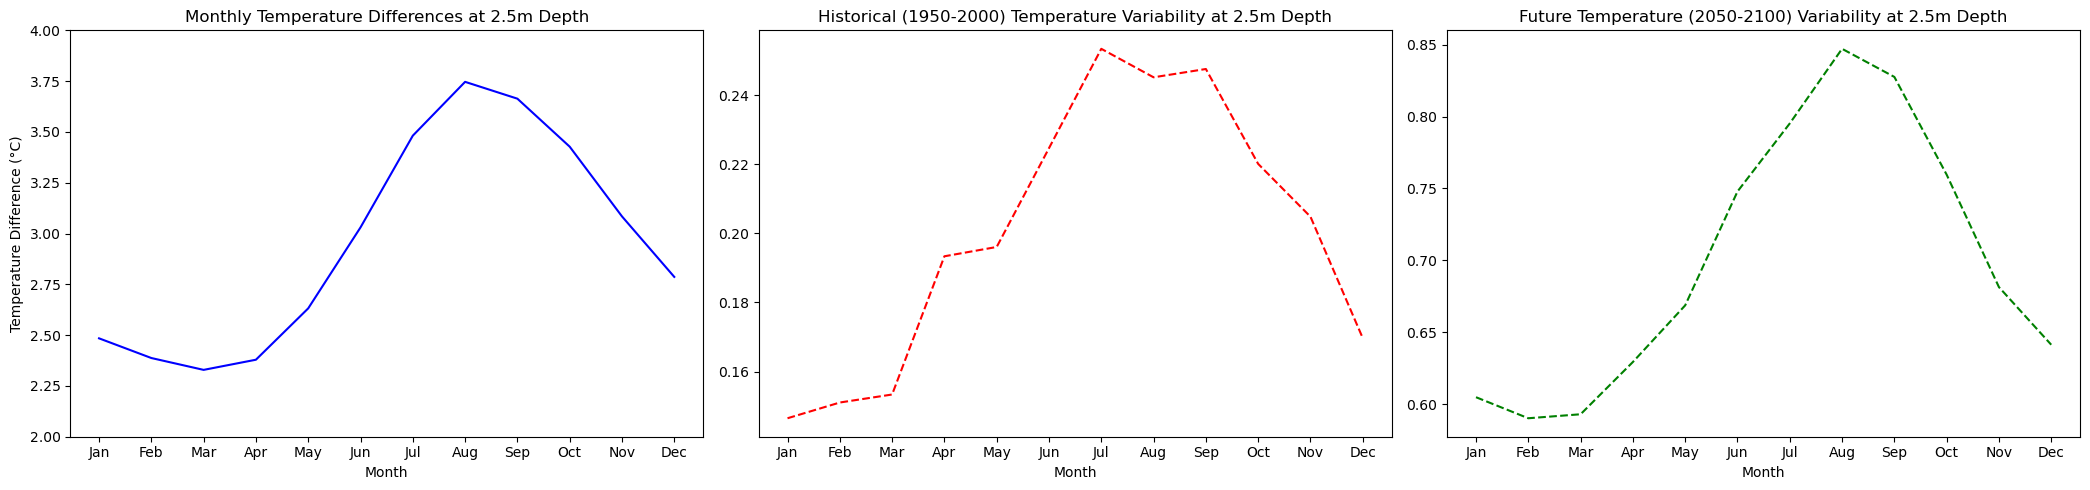

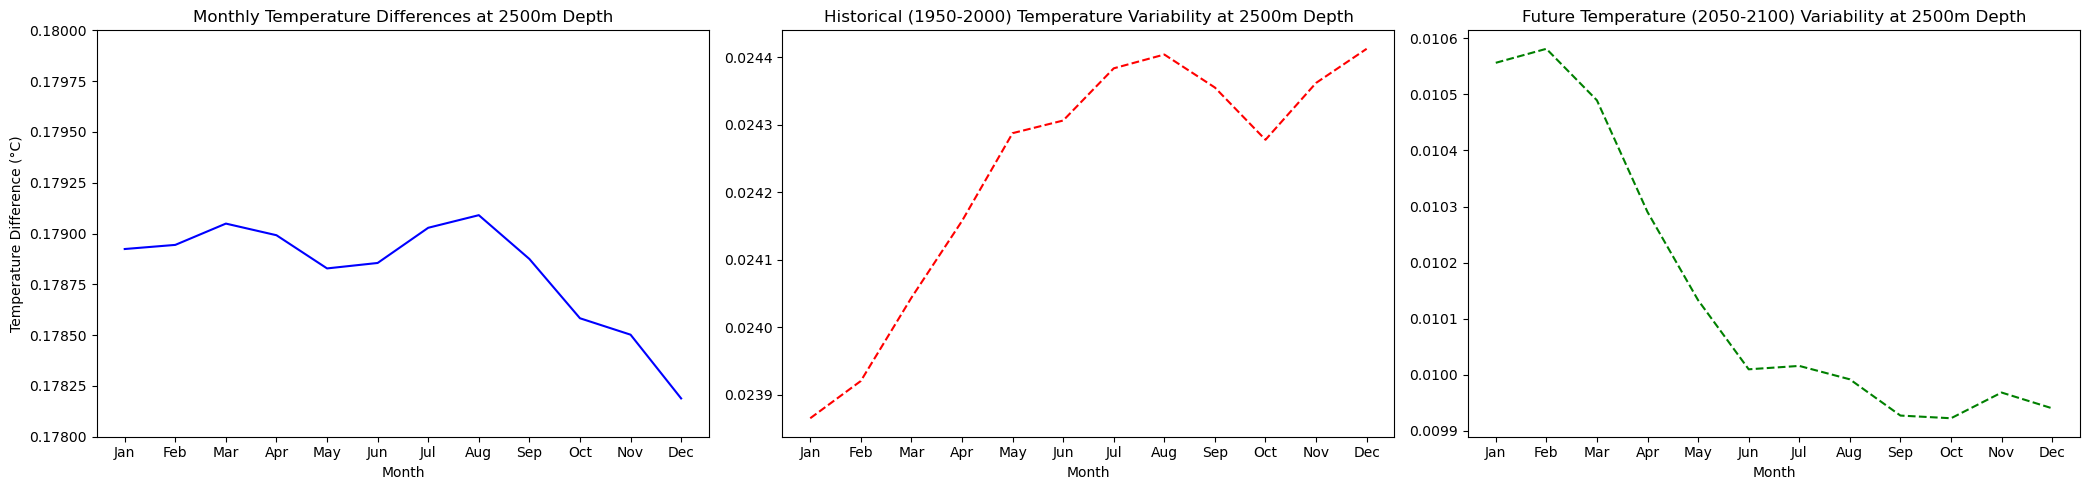

In [73]:
# Suppress warnings
warnings.filterwarnings("ignore")

def calculate_spatial_average(thetao):
    weights = np.cos(np.deg2rad(thetao.lat))
    weights_array = weights / weights.sum()
    spatial_mean = thetao.weighted(weights_array).mean(dim=['lat', 'lon'])
    return spatial_mean

def monthly_analysis(hist_avg, fut_avg):
    hist_monthly = hist_avg.groupby('time.month').mean(dim='time')
    fut_monthly = fut_avg.groupby('time.month').mean(dim='time')
    monthly_diff = fut_monthly - hist_monthly
    hist_variability = hist_avg.groupby('time.month').std(dim='time')
    fut_variability = fut_avg.groupby('time.month').std(dim='time')
    return monthly_diff, hist_variability, fut_variability

# Load datasets
t_hist_2p5m = xr.open_dataset('t_hist_2p5m.nc').thetao
t_hist_2500m = xr.open_dataset('t_hist_2500m.nc').thetao
t_fut_2p5m = xr.open_dataset('t_fut_2p5m.nc').thetao
t_fut_2500m = xr.open_dataset('t_fut_2500m.nc').thetao

# Calculate spatially-weighted average temperature for historical data
hist_avg_2p5m = calculate_spatial_average(t_hist_2p5m)
hist_avg_2500m = calculate_spatial_average(t_hist_2500m)

# Calculate spatially-weighted average temperature for future data
fut_avg_2p5m = calculate_spatial_average(t_fut_2p5m)
fut_avg_2500m = calculate_spatial_average(t_fut_2500m)

# Perform monthly analysis
monthly_diff_2p5m, hist_variability_2p5m, fut_variability_2p5m = monthly_analysis(hist_avg_2p5m, fut_avg_2p5m)
monthly_diff_2500m, hist_variability_2500m, fut_variability_2500m = monthly_analysis(hist_avg_2500m, fut_avg_2500m)

# Define month names for plotting
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Plot 2.5m depth in 1x3 grid
plt.figure(figsize=(21, 5))

plt.subplot(1, 3, 1)
plt.plot(months, monthly_diff_2p5m, color='blue')
plt.ylim(2, 4)
plt.title('Monthly Temperature Differences at 2.5m Depth')
plt.xlabel('Month')
plt.ylabel('Temperature Difference (°C)')

plt.subplot(1, 3, 2)
plt.plot(months, hist_variability_2p5m, color='red', linestyle='--')
plt.title('Historical (1950-2000) Temperature Variability at 2.5m Depth')
plt.xlabel('Month')

plt.subplot(1, 3, 3)
plt.plot(months, fut_variability_2p5m, color='green', linestyle='--')
plt.title('Future Temperature (2050-2100) Variability at 2.5m Depth')
plt.xlabel('Month')

plt.tight_layout()
plt.show()

# Plot 2500m depth in 1x3 grid
plt.figure(figsize=(21, 5))

plt.subplot(1, 3, 1)
plt.plot(months, monthly_diff_2500m, color='blue')
plt.ylim(0.1780, 0.180)
plt.title('Monthly Temperature Differences at 2500m Depth')
plt.xlabel('Month')
plt.ylabel('Temperature Difference (°C)')

plt.subplot(1, 3, 2)
plt.plot(months, hist_variability_2500m, color='red', linestyle='--')
plt.title('Historical (1950-2000) Temperature Variability at 2500m Depth')
plt.xlabel('Month')

plt.subplot(1, 3, 3)
plt.plot(months, fut_variability_2500m, color='green', linestyle='--')
plt.title('Future Temperature (2050-2100) Variability at 2500m Depth')
plt.xlabel('Month')

plt.tight_layout()
plt.show()


__________________________________________________________________________________________________________________________________________________________________________________________________________

(b) calculate the difference in time-mean temperature and make a figure comparing this to the year-to-year variability in each period.

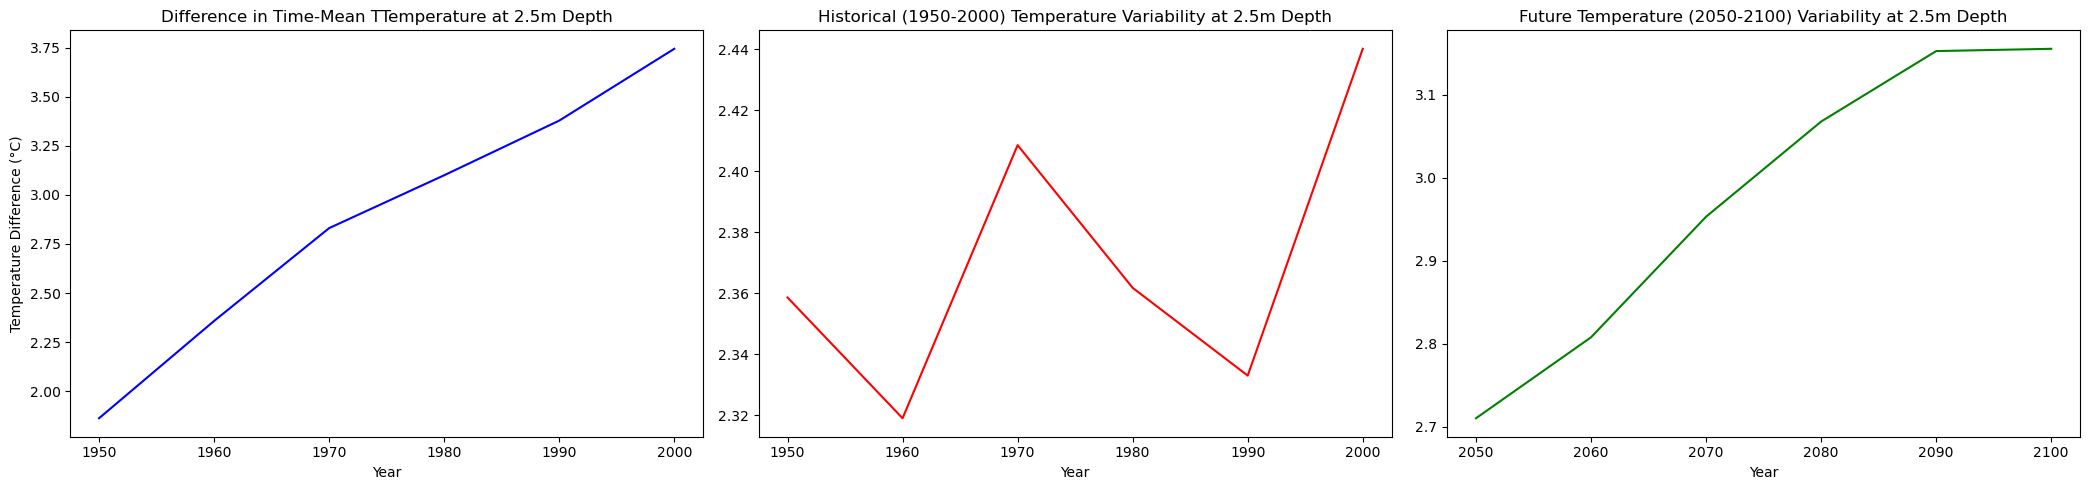

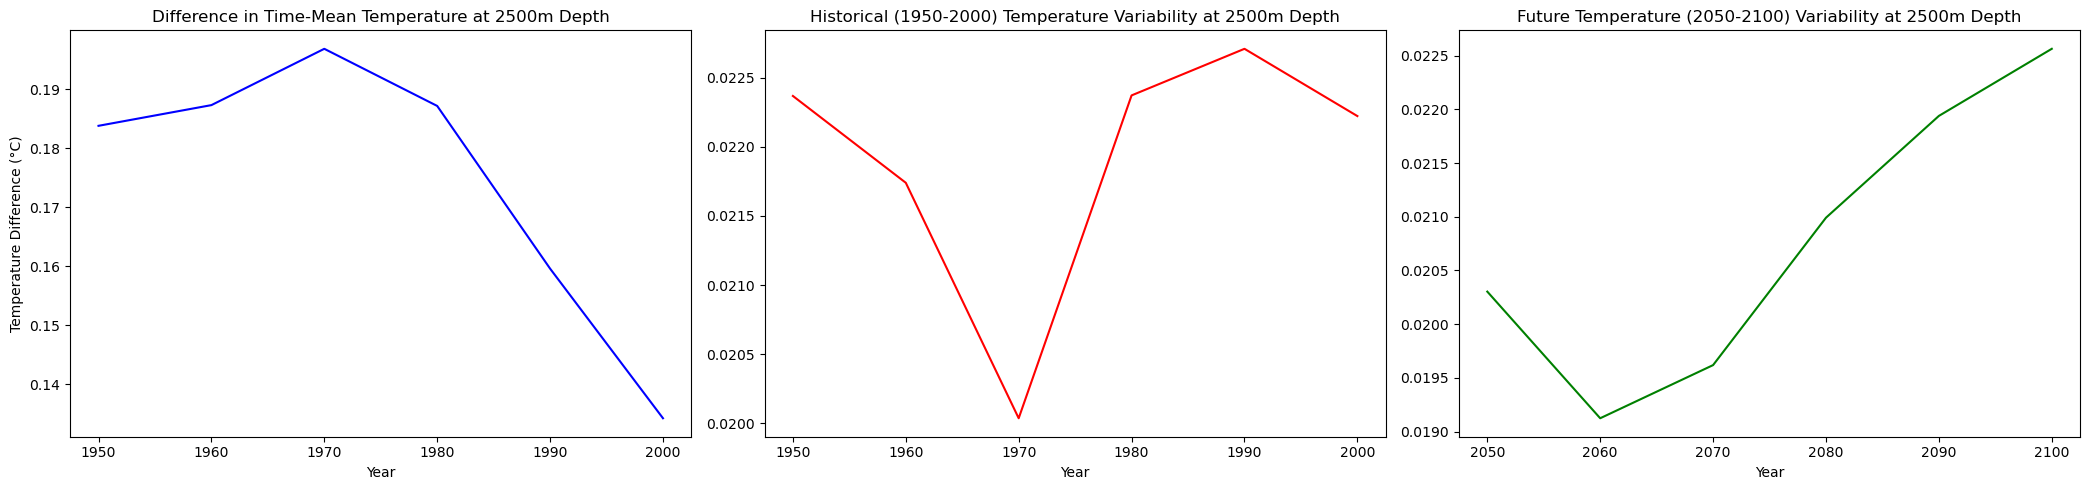

In [74]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Define lists of years for historical and future periods
hist_years = ["1950", "1960", "1970", "1980", "1990", "2000"]
fut_years = ["2050", "2060", "2070", "2080", "2090", "2100"]

def calculate_spatial_average(thetao):
    weights = np.cos(np.deg2rad(thetao.lat))
    weights_array = weights / weights.sum()
    spatial_mean = thetao.weighted(weights_array).mean(dim=['lat', 'lon'])
    return spatial_mean

# Calculate year-to-year average potential temperatures for 2.5m and 2500m depths
hist_avg_2p5m = [calculate_spatial_average(t_hist_2p5m.sel(time=str(year))).mean().values for year in hist_years]
fut_avg_2p5m = [calculate_spatial_average(t_fut_2p5m.sel(time=str(year))).mean().values for year in fut_years]
hist_avg_2500m = [calculate_spatial_average(t_hist_2500m.sel(time=str(year))).mean().values for year in hist_years]
fut_avg_2500m = [calculate_spatial_average(t_fut_2500m.sel(time=str(year))).mean().values for year in fut_years]

# Calculate differences in time-mean temperatures
diff_2p5m_avg = [fut - hist for fut, hist in zip(fut_avg_2p5m, hist_avg_2p5m)]
diff_2500m_avg = [fut - hist for fut, hist in zip(fut_avg_2500m, hist_avg_2500m)]

# Flatten the data for variability
hist_var_2p5m_mean = [t_hist_2p5m.sel(time=str(year)).std(dim='time').mean(dim=['lat', 'lon']).values for year in hist_years]
fut_var_2p5m_mean = [t_fut_2p5m.sel(time=str(year)).std(dim='time').mean(dim=['lat', 'lon']).values for year in fut_years]
hist_var_2500m_mean = [t_hist_2500m.sel(time=str(year)).std(dim='time').mean(dim=['lat', 'lon']).values for year in hist_years]
fut_var_2500m_mean = [t_fut_2500m.sel(time=str(year)).std(dim='time').mean(dim=['lat', 'lon']).values for year in fut_years]

# Plot 2.5m depth in 1x3 grid
plt.figure(figsize=(21, 5))

plt.subplot(1, 3, 1)
plt.plot(hist_years, diff_2p5m_avg, color='blue')
plt.title('Difference in Time-Mean TTemperature at 2.5m Depth')
plt.xlabel('Year')
plt.ylabel('Temperature Difference (°C)')

plt.subplot(1, 3, 2)
plt.plot(hist_years, hist_var_2p5m_mean, color='red')
plt.title('Historical (1950-2000) Temperature Variability at 2.5m Depth')
plt.xlabel('Year')

plt.subplot(1, 3, 3)
plt.plot(fut_years, fut_var_2p5m_mean, color='green')
plt.title('Future Temperature (2050-2100) Variability at 2.5m Depth')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

# Plot 2500m depth in 1x3 grid
plt.figure(figsize=(21, 5))

plt.subplot(1, 3, 1)
plt.plot(hist_years, diff_2500m_avg, color='blue')
plt.title('Difference in Time-Mean Temperature at 2500m Depth')
plt.xlabel('Year')
plt.ylabel('Temperature Difference (°C)')

plt.subplot(1, 3, 2)
plt.plot(hist_years, hist_var_2500m_mean, color='red')
plt.title('Historical (1950-2000) Temperature Variability at 2500m Depth')
plt.xlabel('Year')

plt.subplot(1, 3, 3)
plt.plot(fut_years, fut_var_2500m_mean, color='green')
plt.title('Future Temperature (2050-2100) Variability at 2500m Depth')
plt.xlabel('Year')

plt.tight_layout()
plt.show()


__________________________________________________________________________________________________________________________________________________________________________________________________________

**Results** improve this

The analysis compared the average potential temperatures at two depths, 2.5 meters and 2500 meters, over the historical period from 1950 to 2000 and the projected future period from 2050 to 2100. The findings highlight the significant impact of climate change on temperature trends and variability.

During the historical period (1950-2000), the average potential temperature at a depth of 2.5 meters was 19.65°C, while at a depth of 2500 meters, it was 4.05°C. In the projected future period (2050-2100), the average potential temperature at a depth of 2.5 meters is expected to rise to 22.60°C, and at a depth of 2500 meters, it is projected to increase to 4.23°C. These calculations demonstrate a substantial increase in temperatures at both depths over time.

Additionally, the analysis of monthly average temperature differences between the two periods reveals significant increases, especially at the shallower depth of 2.5 meters. The comparison of these differences with the variability in monthly temperatures indicates that the projected future period will experience greater temperature fluctuations. Furthermore, the comparison of the difference in time-mean temperature between the two periods with the year-to-year variability within each period underscores an overall increase in average temperatures and a trend towards greater variability in the future.

__________________________________________________________________________________________________________________________________________________________________________________________________________